In [1]:
import os
import sys
import gains as genetic
from gains.salt_generator import *
import pandas as pd
import rdkit
import pickle
from math import exp
import numpy as np
import random
import unittest
import datetime
import sys
import sklearn
import salty

from numpy import array, all
from rdkit.Chem import Draw
from rdkit import RDConfig
from rdkit.Chem import FragmentCatalog
from rdkit import RDConfig
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import ShowMol
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.ML.Descriptors.MoleculeDescriptors import\
    MolecularDescriptorCalculator as calculator

%matplotlib inline

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [5]:
target = 1000
model_ID = "density_m3"
generate_solvent(target, model_ID, sim_bounds=[0.1, 1], heavy_atom_limit=1e8, hits=1)

C[NH+]1C(CCC1)=O	0.8613299999999999	starting structure
C[NH+]1C(=O)CCC1N	0.93175	add_atom
CCCCNC1CCC(=O)[NH+]1C	0.98933	add_custom_fragment
CCCCCCNC1CCC(=O)[NH+]1C	0.99494	add_custom_fragment
number of atoms: 	14
mutation attempts: 	68
with density: 		994.94 (kg/m)
similarity score:       0.617
molecular relative: 	N-methylpyrrolidone



,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,Error
0,C01_A01,CCCCCCNC1CCC(=O)[NH+]1C.CC(N)C(=O)[O-],14,0.616822,N-methylpyrrolidone,L-alaninate,994.94,NaN,NaN


In [6]:
salty.check_name("phosphate")

'[O-]P(=O)([O-])[O-]'

In [119]:
out = pd.DataFrame()
for j in np.arange(40,100,10):
    df = pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/salt_log.csv" % j) #or salt_candidates
    inner = pd.DataFrame()
    for i in range(1,26):
        if i < 10:
            CAT_ID = "C0%s" % i
            AN_ID = "A0%s" % i
        else:
            CAT_ID = "C%s" % i
            AN_ID = "A%s" % i
        Salt_ID = CAT_ID + "_" + AN_ID
        try:
            mean = np.round(pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/%s.dens" % (j, Salt_ID)).describe().loc["mean"][1])
            std = np.round(pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/%s.dens" % (j, Salt_ID)).describe().loc["std"][1])
            value = ("{}{}{}".format(mean," +/- ", std))
            true = df.loc[df["Salt ID"] == Salt_ID, "Model Density"]
            difference = (true - mean)/true*100
            df.loc[df["Salt ID"] == Salt_ID, "MD Density"] = value
            df.loc[df["Salt ID"] == Salt_ID, "Error"] = difference #this is % Difference in old version
        except:
            pass
    df.dropna(inplace=True)
    out = pd.concat([df, out], axis=0) 
out.reset_index(drop=True, inplace=True)
out

,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,Error
0,C03_A03,O=C(C[n+]1ccccc1)OCCO.O=S(=O)(F)[N-]S(=O)(=O)F,13,0.917647,1-(2-ethoxy-2-oxoethyl)-pyridinium,bis(fluorosulfonyl)amide,1514.04,1511.0 +/- 33.0,0.200787
1,C05_A05,COCCn1cc[n+](C)c1C.O=S(=O)([O-])C(F)(F)C(F)OC(...,11,0.915493,"1-(2-hydroxyethyl)-2,3-dimethylimidazolium","1,1,2-trifluoro-2-(perfluoroethoxy)ethanesulfo...",1502.11,1423.0 +/- 28.0,5.266592
2,C06_A06,C[n+]1ccn(CCCS(=O)(=O)OO)c1.O=S(=O)([N-]S(=O)(...,14,0.924528,1-methyl-3-(3-sulfopropyl)-imidazolium,bis[(trifluoromethyl)sulfonyl]imide,1498.09,1593.0 +/- 37.0,-6.335400
3,C09_A09,CCC[N+](C)(C)CCC.O=S(=O)([N-]S(=O)(=O)C(F)(F)C...,9,0.903226,"N-ethyl-N,N-dimethyl-1-propanaminium",bis(perfluoroethylsulfonyl)imide,1491.02,1453.0 +/- 51.0,2.549932
4,C11_A11,CC(S)CCCC[n+]1ccn(CCC#N)c1.O=S(=O)([O-])C(F)(F...,16,0.925373,3-(2-cyanoethyl)-1-hexyl-1H-imidazolium,"1,1,2-trifluoro-2-(perfluoroethoxy)ethanesulfo...",1496.91,1364.0 +/- 46.0,8.878957
5,C13_A13,Cn1cc[n+](CCCCCCOS)c1.O=S(=O)([O-])C(F)(F)C(F)...,14,0.930851,3-(6-hydroxyhexyl)-1-methylimidazolium,"1,1,2,3,3,3-hexafluoro-1-propanesulfonate",1500.32,1367.0 +/- 39.0,8.886104
6,C14_A14,N#CCCn1cc[n+](CC=CO)c1.O=S(=O)([N-]S(=O)(=O)C(...,13,0.932367,3-allyl-1-(2-cyanoethyl)-1H-imidazolium,bis(trifluoromethylsulfonyl)imide,1513.98,1512.0 +/- 33.0,0.130781
7,C15_A15,CC[n+]1ccn(CC(C)C)c1.O=S(=O)([N-]S(=O)(=O)C(F)...,11,0.963235,1-isobutyl-3-methylimidazolium,bis(perfluoroethylsulfonyl)imide,1488.39,1446.0 +/- 56.0,2.848044
8,C19_A19,CCSCCCn1c(C)cc(C)[n+]1-c1ccccc1.O=S(=O)([N-]S(...,19,0.913924,"1-phenyl-2-butyl-3,5-dimethylpyrazolium",bis(perfluoroethylsulfonyl)imide,1485.03,1376.0 +/- 32.0,7.341939
9,C22_A22,C[N+]1(C)CCOCC1.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)...,8,0.916667,4-ethyl-4-methylmorpholin-4-ium,bis[(trifluoromethyl)sulfonyl]imide,1507.34,1608.0 +/- 47.0,-6.677989


In [190]:
out_1000.reset_index(inplace=True, drop=True)
out_1000

,level_0,index,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,% Difference
0,0,0,C01_A01,CCCCCCCC[n+]1cc[nH]c1.COP(=O)([O-])OC,13,0.900000,1-butylimidazolium,dimethylphosphate,978,1069.0 +/- 38.0,-35.2634
1,1,1,C04_A04,Cn1cc[n+](CCCCCCCCCCP)c1.N#C[S-],17,0.937853,1-methyl-3-octyl-1H-imidazolium,thiocyanate,999,1013.0 +/- 25.0,-29.7449
2,2,2,C05_A05,CCCC(CC)CCCCn1cc[n+](CCC#N)c1.N#C[S-],19,0.940299,3-(2-cyanoethyl)-1-decyl-1H-imidazolium,thiocyanate,1024,992.0 +/- 39.0,-35.6648
3,3,3,C07_A07,Cn1cc[n+](CCCCCCCCO)c1.CCC(=O)[O-],15,0.972067,3-(6-hydroxyhexyl)-1-methylimidazolium,propionate,1017,1008.0 +/- 31.0,-30.0014
4,4,4,C08_A08,CCCCn1c(C)cc(C)[n+]1-c1cccc(F)c1.NCCCCC(N)C(=O...,18,0.905455,"1-phenyl-2-butyl-3,5-dimethylpyrazolium",L-lysinate,1036,1059.0 +/- 36.0,-24.0198
5,5,5,C09_A09,CCCCCCC(C)CC[n+]1cccc(C#N)c1.N#C[N-]C#N,18,0.929515,3-cyano-1-octylpyridinium,dicyanamide,1013,986.0 +/- 34.0,-25.8508
6,6,6,C11_A11,CCc1c(C)cc(C)c[n+]1CCCC(C)CC.CCO[PH](=O)[O-],17,0.975664,"1-hexyl-3,5-dimethylpyridinium",ethyl phosphonate,1029,996.0 +/- 32.0,-31.9332
7,7,7,C12_A12,CCCC[P+](C)(CCCC)CCC(C)N.CCC(=O)[O-],15,0.928571,(3-aminopropyl)tributylphosphonium,propionate,982,913.0 +/- 25.0,-32.0263
8,8,8,C13_A13,CCCCCCC[N+]1(C)CCOCC1.CC(C)CC(N)C(=O)[O-],14,0.990909,4-methyl-4-octylmorpholin-4-ium,L-leucinate,1028,989.0 +/- 37.0,-25.2384
9,9,9,C16_A16,CCC[n+]1ccn(CC(C)C)c1.CC(C)CC(N)C(=O)[O-],12,0.963235,1-isobutyl-3-methylimidazolium,L-leucinate,1023,965.0 +/- 27.0,-36.3539


In [192]:
out_1000

,level_0,index,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,% Difference
0,0,0,C01_A01,CCCCCCCC[n+]1cc[nH]c1.COP(=O)([O-])OC,13,0.900000,1-butylimidazolium,dimethylphosphate,978,1069.0 +/- 38.0,-35.2634
1,1,1,C04_A04,Cn1cc[n+](CCCCCCCCCCP)c1.N#C[S-],17,0.937853,1-methyl-3-octyl-1H-imidazolium,thiocyanate,999,1013.0 +/- 25.0,-29.7449
2,2,2,C05_A05,CCCC(CC)CCCCn1cc[n+](CCC#N)c1.N#C[S-],19,0.940299,3-(2-cyanoethyl)-1-decyl-1H-imidazolium,thiocyanate,1024,992.0 +/- 39.0,-35.6648
3,3,3,C07_A07,Cn1cc[n+](CCCCCCCCO)c1.CCC(=O)[O-],15,0.972067,3-(6-hydroxyhexyl)-1-methylimidazolium,propionate,1017,1008.0 +/- 31.0,-30.0014
4,4,4,C08_A08,CCCCn1c(C)cc(C)[n+]1-c1cccc(F)c1.NCCCCC(N)C(=O...,18,0.905455,"1-phenyl-2-butyl-3,5-dimethylpyrazolium",L-lysinate,1036,1059.0 +/- 36.0,-24.0198
5,5,5,C09_A09,CCCCCCC(C)CC[n+]1cccc(C#N)c1.N#C[N-]C#N,18,0.929515,3-cyano-1-octylpyridinium,dicyanamide,1013,986.0 +/- 34.0,-25.8508
6,6,6,C11_A11,CCc1c(C)cc(C)c[n+]1CCCC(C)CC.CCO[PH](=O)[O-],17,0.975664,"1-hexyl-3,5-dimethylpyridinium",ethyl phosphonate,1029,996.0 +/- 32.0,-31.9332
7,7,7,C12_A12,CCCC[P+](C)(CCCC)CCC(C)N.CCC(=O)[O-],15,0.928571,(3-aminopropyl)tributylphosphonium,propionate,982,913.0 +/- 25.0,-32.0263
8,8,8,C13_A13,CCCCCCC[N+]1(C)CCOCC1.CC(C)CC(N)C(=O)[O-],14,0.990909,4-methyl-4-octylmorpholin-4-ium,L-leucinate,1028,989.0 +/- 37.0,-25.2384
9,9,9,C16_A16,CCC[n+]1ccn(CC(C)C)c1.CC(C)CC(N)C(=O)[O-],12,0.963235,1-isobutyl-3-methylimidazolium,L-leucinate,1023,965.0 +/- 27.0,-36.3539


In [183]:
backup = out_1000

In [186]:
out_1000 = backup

In [198]:
target = 1000
model_ID = "density_m3"
#out_1000.reset_index(inplace=True)
for i in range(len(out_1000["Salt Smiles"])):
    genes = out_1000["Salt Smiles"][i].split(".")[0]
    anion = Chem.MolFromSmiles(out_1000["Salt Smiles"][i].split(".")[1])
    score, prediction = salt_generator.get_fitness(anion, genes, target, model_ID)
    if score < 0.95:
        print(i)
        out_1000.drop([i], inplace=True)
        out_1000.reset_index(inplace=True, drop=True)
        
    
    #out_1300["Model Density"][i] = prediction
    diff = (float(prediction) - float(out_1000["MD Density"][i].split()[0])) / float(out_1000["MD Density"][i].split()[0]) * 100
    #out_1300["% Difference"][i] = diff
    #print(score)
    #out_1000.reset_index(inplace=True)

20
21
25
35
37


KeyError: 42

In [53]:
out.drop([23,55,58], inplace=True)
out.reset_index(inplace=True)

In [ ]:
driver = webdriver.Chrome()
driver.get("http://www.chemspider.com/")
out.reset_index(inplace=True)
results=[]

In [ ]:
###This cell checks that entries are not existent in the world
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

for i in range(52,out.shape[0]):
    ion = out["Salt Smiles"][i].split(".")[0]
    search = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_qs_query\"]")
    search.clear()
    search.send_keys(ion)
    submit = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_search_btn\"]")
    submit.click()
    time.sleep(5)
    try:
        name = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_ContentSection"\
                                            "_ContentPlaceHolder1_RecordViewDetails"\
                                            "_rptDetailsView_ctl00_WrapTitle\"]")
        results.append([ion, name.text])
        print(ion, name.text)
        time.sleep(3)
    except:
        results.append([ion, "new molecule"])
        print("{}\t{}".format("name not found for:",ion))

In [20]:
b = pd.DataFrame(a)
b.to_csv("existance_results.csv",index=False, indicator=True)

NameError: name 'a' is not defined

In [7]:
results
a = np.array(results)
a[:,1]

NameError: name 'results' is not defined

In [224]:
out_1000 = out_1000.loc[out_1000["Tanimoto Similarity Score"] > 0.9]
out_1300 = out_1300.loc[out_1300["Tanimoto Similarity Score"] > 0.9]
out_1500 = out_1500.loc[out_1500["Tanimoto Similarity Score"] > 0.9]

In [228]:
out_1000.reset_index(drop=True, inplace=True)
out_1300.reset_index(drop=True, inplace=True)
out_1500.reset_index(drop=True, inplace=True)

In [229]:
md_1000 = []
std_1000 = []
for i in range(out_1000.shape[0]):
    md_1000.append(out_1000["MD Density"][i].split()[0])
    std_1000.append(out_1000["MD Density"][i].split()[2])
md_1300 = []
std_1300 = []
for i in range(out_1300.shape[0]):
    md_1300.append(out_1300["MD Density"][i].split()[0])
    std_1300.append(out_1300["MD Density"][i].split()[2])
md_1500 = []
std_1500 = []
for i in range(out_1500.shape[0]):
    md_1500.append(out_1500["MD Density"][i].split()[0])
    std_1500.append(out_1500["MD Density"][i].split()[2])

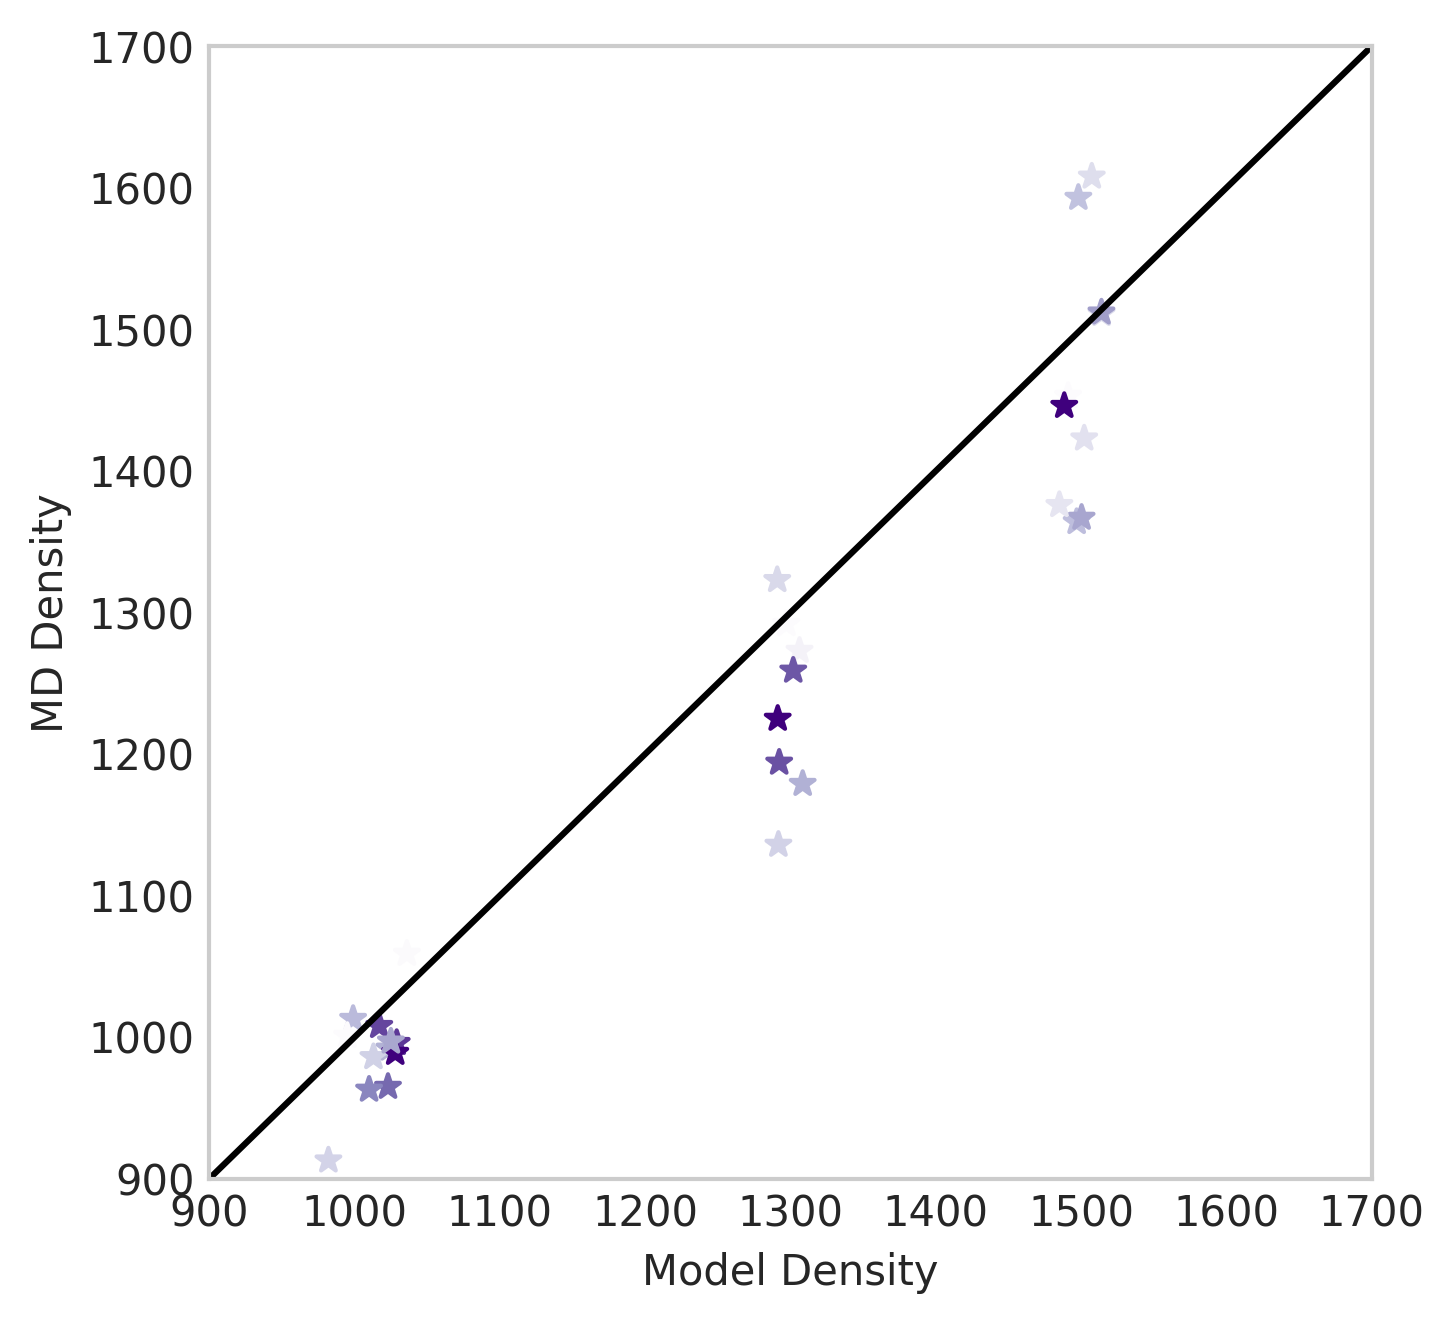

In [234]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lin
#poop = np.abs(out["% Difference"].values)
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(5,5), dpi=300)
    ax = fig.add_subplot(111)
    ax.scatter(out_1000["Model Density"], md_1000, marker="*",
               c=out_1000["Tanimoto Similarity Score"], cmap="Purples")
    ax.scatter(out_1300["Model Density"], md_1300, marker="*",
               c=out_1300["Tanimoto Similarity Score"], cmap="Purples")
    ax.scatter(out_1500["Model Density"], md_1500, marker="*",
               c=out_1500["Tanimoto Similarity Score"], cmap="Purples")
    ax.plot([900,1700], [900,1700], linestyle="-", label=None, c="black")
    #ax.plot([0,X0],[Y0,0], label="Best fit R-squared: 0.25")
    #ax.set_xlim(0.4,1)
    #ax.set_ylim(0,11)
    #ax.legend(bbox_to_anchor=(1,1))
    ax.set_ylabel("MD Density")
    ax.set_xlabel("Model Density")
    plt.xlim(900,1700)
    plt.ylim(900,1700)
    ax.grid()
    
fig.savefig(filename='../../designer_molecules/6.eps', 
                       bbox_inches='tight', format='eps') 

In [101]:
df = salty.load_data("cationInfo.csv")
parent_candidates = df["smiles"].unique()
to_plot=[]
for i in range(out.shape[0]):
    smi = out.iloc[i]["Salt Smiles"].split(".")[0]
    mol = Chem.MolFromSmiles(smi)
    chro = genetic.Chromosome(smi, 0)
    score, index = genetic.molecular_similarity(chro, parent_candidates, all=True)
    score.append(out.iloc[i]["% Difference"])
    to_plot.append(score)
points = np.array(to_plot)
sim_scores = []
for i in range(points.shape[1]-1):
    sim_scores.append(points[:,i])

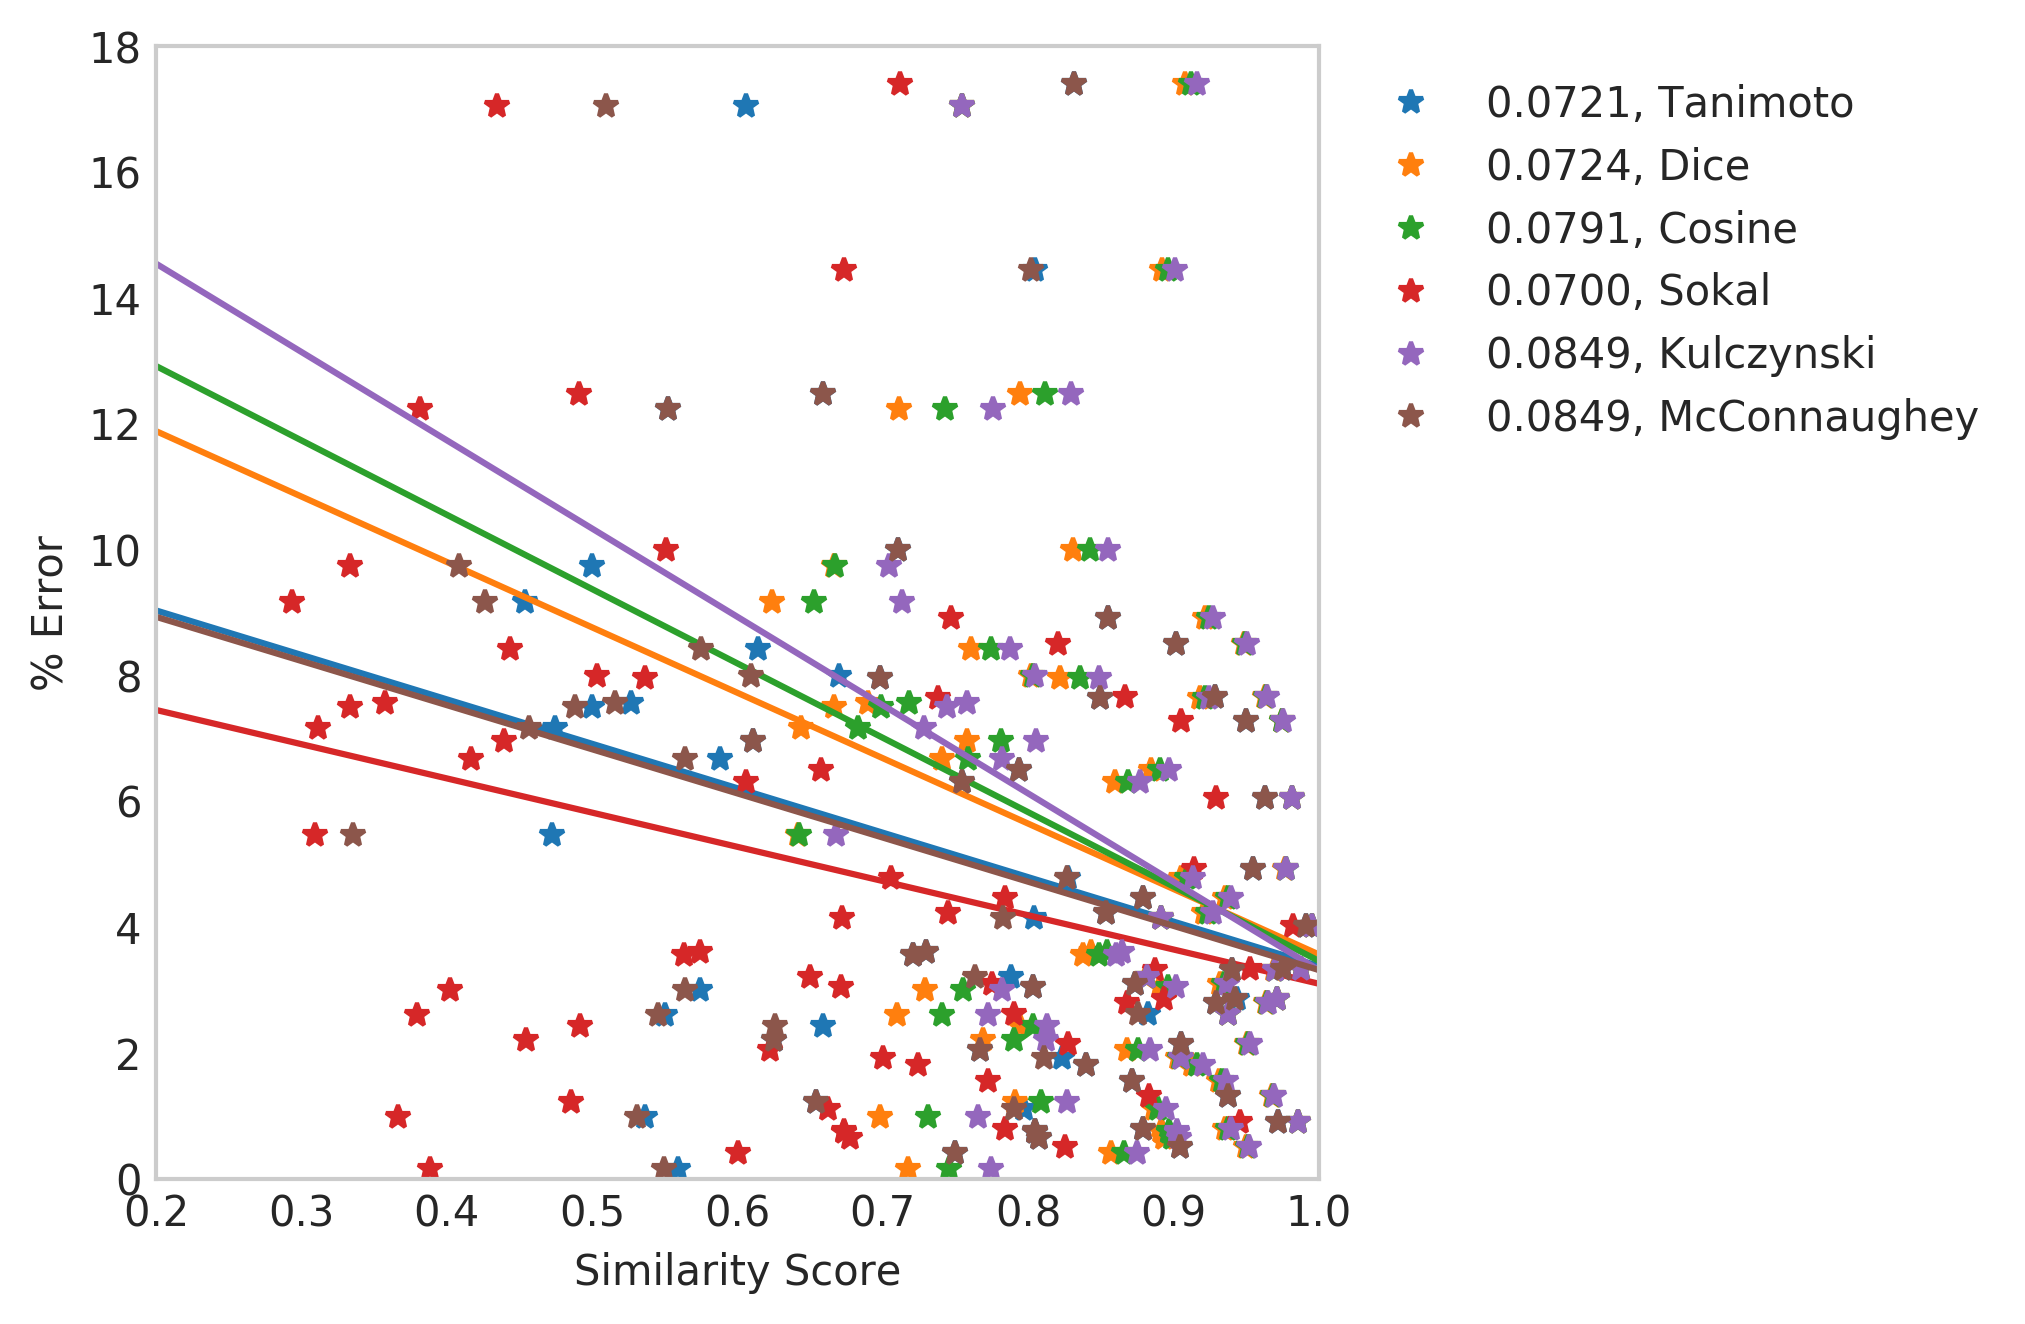

In [104]:
metrics = ["Tanimoto", "Dice", "Cosine", "Sokal", 
           "Kulczynski", "McConnaughey"]
r_sqr = []
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(5,5), dpi=300)
    ax = fig.add_subplot(111)
    for i in range(len(sim_scores)):
        X=sim_scores[i].reshape(-1,1)
        Y=np.abs(out["% Difference"]).values.reshape(-1,1)
        model = lin()
        model.fit(X,Y)
        if model.coef_ < 0:
            Y0=model.intercept_
            X0=abs(model.intercept_/model.coef_)
        else:
            print("pos corr")
        r_sqr.append(model.score(X,Y))
        for j in range(len(sim_scores[0])):
        
            if j == 0:
                ax.plot(sim_scores[i][j], np.abs(out.iloc[j]["% Difference"]), 
                        linestyle="", marker="*", c=tableau20[i*2],
                       label="{:3.4f}, {}".format(r_sqr[i], metrics[i]))
                ax.plot([0,X0],[Y0,0])
    
            else:
                ax.plot(sim_scores[i][j], np.abs(out.iloc[j]["% Difference"]), 
                        linestyle="", marker="*", c=tableau20[i*2])
    ax.set_xlim(0.2,1)
    ax.set_ylim(0,18)
    ax.set_ylabel("% Error")
    ax.set_xlabel("Similarity Score")
    ax.legend(bbox_to_anchor=(1.6,1))
    
    ax.grid()
fig.savefig(filename='../../designer_molecules/3.eps', 
                       bbox_inches='tight', format='eps') 